### import libraries

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_boston
from mpl_toolkits.mplot3d import Axes3D

### load data

In [36]:
boston_dataset = load_boston()

C:\Users\Beni\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the 

- CRIM: Per capita crime rate by town
- ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
- INDUS: Proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: Nitric oxide concentration (parts per 10 million)
- RM: Average number of rooms per dwelling
- AGE: Proportion of owner-occupied units built prior to 1940
- DIS: Weighted distances to five Boston employment centers
- RAD: Index of accessibility to radial highways
- TAX: Full-value property tax rate per $10,000
- PTRATIO: Pupil-teacher ratio by town
- B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
- LSTAT: Percentage of lower status of the population
- MEDV: Median value of owner-occupied homes in $1000s

In [37]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [38]:
boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [39]:
X = boston[['CRIM', 'TAX']]
X.head()

,CRIM,TAX
0,0.00632,296.0
1,0.02731,242.0
2,0.02729,242.0
3,0.03237,222.0
4,0.06905,222.0


In [40]:
Y = boston[['MEDV']]
Y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [ ]:
X = X.to_numpy()
Y = Y.to_numpy()

Text(0.5, 0, 'MEDV')

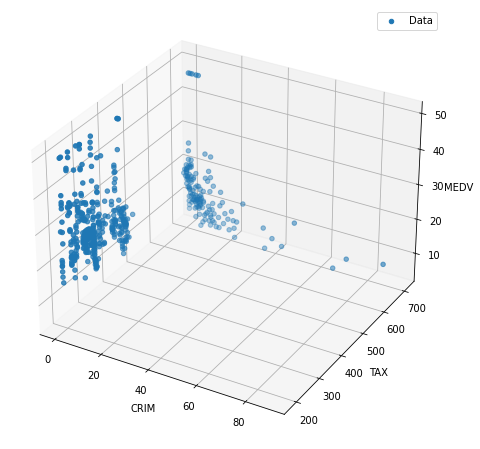

In [85]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection="3d")
ax.scatter(X[:,0],X[:,1],Y, label='Data')
ax.legend(loc='best')
ax.set_xlabel("CRIM")
ax.set_ylabel("TAX")
ax.set_zlabel("MEDV")
#plt.plot(X, res.intercept + res.slope*X, 'r', label='fitted line-scipy', lw=2)
#plt.legend(loc='best')
#plt.show()

In [44]:
slope = np.matmul(np.linalg.inv(np.matmul(X.T, X)), np.matmul(X.T, Y))
slope

array([[-0.84226054],
       [ 0.05346775]])

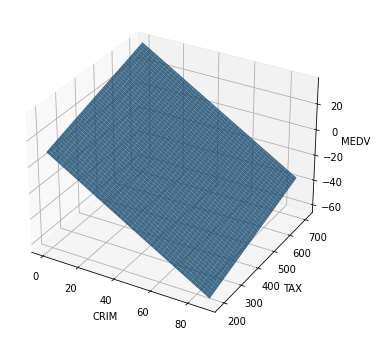

In [87]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection='3d')

x_range = np.arange(X[:,0].min(), X[:,0].max())
y_range = np.arange(X[:,1].min(), X[:,1].max())

x, y = np.meshgrid(x_range, y_range)
 
z = x * slope[0] + y * slope[1]
ax.plot_surface(x, y, z, alpha = 0.8)
ax.set_xlabel("CRIM")
ax.set_ylabel("TAX")
ax.set_zlabel("MEDV")
plt.show()

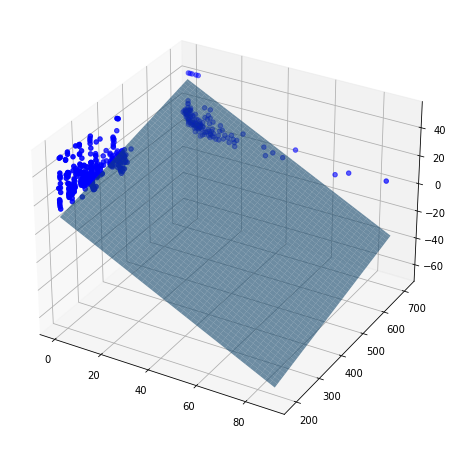

In [63]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x, y, z, alpha = 0.6)
ax.scatter(X[:,0],X[:,1],Y, c='blue')
ax.set_xlabel("CRIM")
ax.set_ylabel("TAX")
ax.set_zlabel("MEDV")
plt.show()

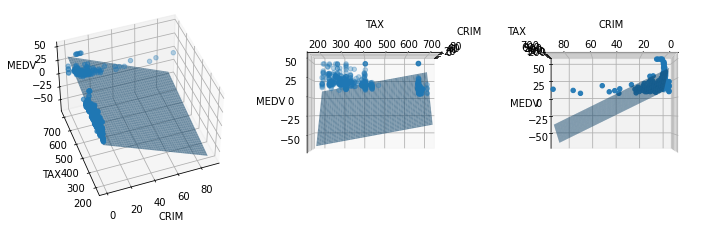

In [84]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(131,projection='3d')
ax.elev = 43.5
ax.azim = -110
#ax = Axes3D(fig, elev=elev, azim=azim)
ax.plot_surface(x, y, z, alpha = 0.6)
ax.scatter(X[:,0],X[:,1],Y)
ax.set_xlabel("CRIM")
ax.set_ylabel("TAX")
ax.set_zlabel("MEDV")


#fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(132,projection='3d')
ax.elev = -0.5
ax.azim = 0
#ax = Axes3D(fig, elev=elev, azim=azim)
ax.plot_surface(x, y, z, alpha = 0.6)
ax.scatter(X[:,0],X[:,1],Y)
ax.set_xlabel("CRIM")
ax.set_ylabel("TAX")
ax.set_zlabel("MEDV")


#fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(133,projection='3d')
ax.elev = -0.5
ax.azim = 90
#ax = Axes3D(fig, elev=elev, azim=azim)
ax.plot_surface(x, y, z, alpha = 0.6)
ax.scatter(X[:,0],X[:,1],Y)
ax.set_xlabel("CRIM")
ax.set_ylabel("TAX")
ax.set_zlabel("MEDV")
plt.show()